In [1]:
%reload_ext autoreload

%autoreload 2

from model import *
import functools as ft
import matplotlib.pyplot as plt
from skimage.io import imsave

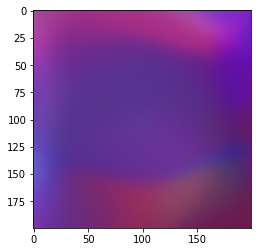

In [2]:
latent_dim = 8 # Was: 9
TAXICAB    = ft.partial(np.linalg.norm, axis=0, ord=1)
EUCLIDEAN  = ft.partial(np.linalg.norm, axis=0, ord=2)
norm       = ft.partial(np.linalg.norm, axis=0, ord=-2)
norm       = EUCLIDEAN


c = Config( net_size = 20 # Was: 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = []
          )

size   = 200
width  = size
height = size

m = build_model(c, width, height)

sess = tf.InteractiveSession()

z = np.random.normal(0, 1, size=c.latent_dim)

sess.run(tf.global_variables_initializer())
yys = forward(sess, c, m, z, width, height)

ys = stitch_together(yys)
plt.imshow(ys.reshape((size, size, c.colours)))

In [3]:
c = Config( net_size = 20 # Was: 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = ["left"]
          )

m = build_model(c, width, height)

0: loss: 6.970434188842773


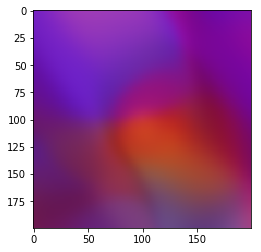

In [4]:
steps = 5000

optim      = tf.train.AdamOptimizer(learning_rate=0.01)
train_step = optim.minimize( m.matching_loss )


matching_pixels = np.transpose(ys[:, width - 1: width, :], [1,0,2])
xs = get_input_data(c, width, height )


sess.run(tf.global_variables_initializer())

for k in range(steps):
    data = { m.matching_pixels: matching_pixels
           , m.xs: xs }
    _, loss = sess.run( [train_step, m.matching_loss], feed_dict=data )

    if loss < 0.1:
        break

    if k % 500 == 0:
        print(f"{k}: loss: {loss}")

new_ys = sess.run( m.ys, feed_dict={ m.xs: xs } )

plt.imshow(new_ys)

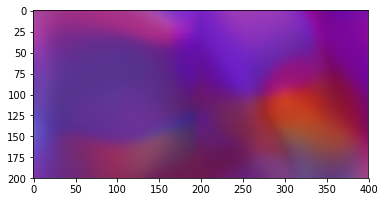

In [5]:
mm = np.concatenate( [ys, new_ys], axis = 1 )
plt.imshow(mm)

0: loss: 5.5664753913879395


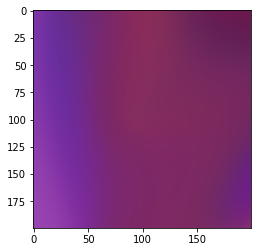

In [6]:
c = Config( net_size = 20 # Was: 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + latent_dim
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = ["top"]
          )

m = build_model(c, width, height)

steps = 5000

optim      = tf.train.AdamOptimizer(learning_rate=0.01)
train_step = optim.minimize( m.matching_loss )

matching_pixels = ys[height - 1: height, :, :]
xs = get_input_data(c, width, height )


sess.run(tf.global_variables_initializer())

for k in range(steps):
    data = { m.matching_pixels: matching_pixels
           , m.xs: xs }
    _, loss = sess.run( [train_step, m.matching_loss], feed_dict=data )

    if loss < 0.07:
        break

    if k % 500 == 0:
        print(f"{k}: loss: {loss}")

newer_ys = sess.run( m.ys, feed_dict={ m.xs: xs } )

plt.imshow(newer_ys)

0: loss: 11.054465293884277
500: loss: 1.3484410047531128
1000: loss: 1.2673472166061401
1500: loss: 1.2497438192367554


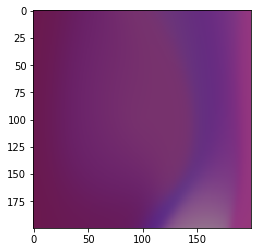

In [7]:
c = Config( net_size = 20 # Was: 50
          , num_dense = 3
          , latent_dim = latent_dim
          , colours = 3
          , input_size = 1 + 1 + 1 + (latent_dim)
          , activation_function = tf.nn.tanh
          , norm = norm
          , border_matchings = ["left", "top"]
          )

m = build_model(c, width, height)

steps = 2000

optim      = tf.train.AdamOptimizer(learning_rate=0.03)
train_step = optim.minimize( m.matching_loss )

matching_pixels_1 = np.transpose(newer_ys[:, width - 1: width, :], [1, 0, 2])
matching_pixels_2 = new_ys[height - 1:height:, :, :]
matching_pixels   = np.concatenate( [matching_pixels_1, matching_pixels_2 ], axis = 0 )

xs = get_input_data(c, width, height )

sess.run(tf.global_variables_initializer())

for k in range(steps):
    data = { m.matching_pixels: matching_pixels
           , m.xs: xs }
    _, loss = sess.run( [train_step, m.matching_loss], feed_dict=data )

    if loss < 0.1:
        break

    if k % 500 == 0:
        print(f"{k}: loss: {loss}")

newerest_ys = sess.run( m.ys, feed_dict={ m.xs: xs } )

plt.imshow(newerest_ys)

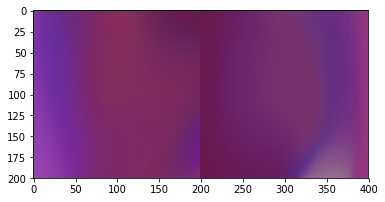

In [8]:
mm2 = np.concatenate( [newer_ys, newerest_ys], axis = 1 )
plt.imshow(mm2)

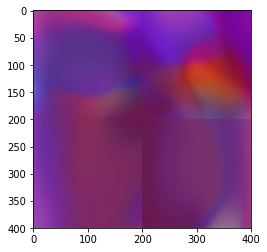

In [9]:
mm3 = np.concatenate( [mm, mm2], axis = 0 )
plt.imshow(mm3)

In [10]:
imsave("multi-7.png", mm3)

/home/noon/tools/miniconda3/envs/cppn-3d/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
